# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Annisa Nurfadilah
- **Email:** annisanurfadilah018@gmail.com
- **ID Dicoding:** annisa_nurfadilah_0zC7

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap penggunaan sepeda?
- Apa dampak kondisi cuaca terhadap jumlah pengguna?
- Jam berapa saja penggunaan sepeda mencapai puncaknya pada hari kerja dibandingkan dengan hari libur?

## Packages/Library yang Digunakan

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [36]:
# Memuat dataset 'day.csv' ke dalam DataFrame pandas bernama 'day_df'
day_df = pd.read_csv("/content/day.csv")

# Menampilkan lima baris pertama dari DataFrame 'day_df' untuk melihat gambaran awal data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
# Memuat dataset 'hour.csv' ke dalam DataFrame pandas bernama 'hour_df'
hour_df = pd.read_csv("/content/hour.csv")

# Menampilkan lima baris pertama dari DataFrame 'hour_df' untuk melihat gambaran awal data
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [38]:
# Menampilkan informasi ringkas tentang DataFrame 'day_df'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Total kolom pada data day_df adalah 16 dengan kondisi tidak ada missing value (NaN)
- Terdapat kesalahan pada column 'dteday' yang harusnya bertipe data 'Date Time'
- Column 'season', 'yr', 'mnth', 'weekday', 'weathersit' harusnya bertipe data 'Kategori'

In [39]:
# Memastikan apakah ada missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ada sama sekali missing value pada kolom

In [40]:
# Mengecek apakah ada duplikasi file
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Menampilkan deskripsi data 'day_df'
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada kolom duplikat.
- Rata-rata temperatur (temp) sekitar 0.495 (dinormalisasi), menunjukkan suhu normal.
- Rata-rata sepeda yang dipinjam per hari (cnt) adalah 4504, dengan variasi peminjaman yang besar (SD 1937.21).
- Pengguna kasual dan terdaftar menunjukkan variasi signifikan dengan SD masing-masing 686.62 dan 1560.26.
- Temperatur berkisar antara 0.059 hingga 0.862, menunjukkan variasi suhu yang cukup.
- Jumlah peminjaman kasual: 2 hingga 3410, pengguna terdaftar: 20 hingga 6946.
- Rata-rata musim (season) 2.50, menunjukkan distribusi sekitar musim panas dan gugur.
- Hari kerja (weekday) rata-rata 2.99, lebih banyak peminjaman terjadi pada awal hingga pertengahan minggu.
- Hanya 3% data mencakup hari libur.
- Sebagian besar peminjaman terjadi dalam kondisi cuaca baik, rata-rata weathersit 1.39.

In [41]:
# Menampilkan informasi ringkas tentang DataFrame 'hour_df'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Total kolom pada data hour_df adalah 17 dengan kondisi tidak ada missing value (NaN)
- Terdapat kesalahan pada column 'dteday' yang harusnya bertipe data 'Date Time'
- Mengubah column 'season', 'yr', 'mnth', 'weekday', 'weathersit' menjadi tipe data 'Kategori'

In [42]:
# Memastikan apakah ada missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada sama sekali missing value pada kolom

In [43]:
# Mengecek apakah ada duplikasi file
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Menampilkan deskripsi data 'hour_df'
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada kolom duplikat.
- Data tersebar merata di semua musim dengan distribusi yang seimbang antara tahun 2011 dan 2012.
- Data mencakup seluruh bulan dan jam dengan representasi yang baik sepanjang hari.
- 3% data adalah hari libur, dan 68% adalah hari kerja.
- Sebagian besar peminjaman terjadi dalam kondisi cuaca baik.
- Suhu rata-rata berada di kisaran normal, kelembapan dan kecepatan angin stabil.
- Rata-rata peminjaman oleh pengguna kasual sekitar 35,67, sementara pengguna terdaftar lebih banyak, dengan rata-rata 153,79.
- Rata-rata total sepeda yang disewa per hari adalah 189,46, dengan maksimum mencapai 977.

### Cleaning Data

In [44]:
# Mengubah tipe data 'dteday' ke 'Date Time'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah tipe data 'season', 'year', 'month', 'weekday', 'weathersit' ke 'Category'
columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype('category')

**Insight:**
- Kolom dteday diubah menjadi tipe data DateTime.
- Kolom season, yr, mnth, weekday, dan weathersit diubah menjadi tipe data Category, yang mempercepat operasi analisis, karena kolom-kolom ini merepresentasikan kategori diskrit yang tidak memerlukan tipe data numerik.

In [45]:
# Menghapus kolom 'instant' karena tidak diperlukan
day_df = day_df.drop(columns=['instant'])

**Insight:**
- Menghapus kolom instant yang tidak relevan untuk analisis.

In [46]:
# Memeriksa informasi umum mengenai DataFrame 'day_df'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

**Insight:**
- Tipe data sudah sesuai

In [47]:
# Menampilkan 5 baris pertama dari dataset day_df untuk melihat struktur data
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
# Mengubah tipe data 'dteday' ke 'Date Time'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah tipe data 'season', 'year', 'month', 'weekday', 'weathersit' ke 'Category'
columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for column in columns:
    hour_df[column] = hour_df[column].astype('category')

**Insight:**
- Kolom 'dteday' diubah menjadi tipe data DateTime, memungkinkan pemrosesan tanggal yang lebih efisien dan analisis temporal.
- Kolom 'season', 'yr', 'mnth', 'weekday', dan 'weathersit' diubah menjadi tipe data Category karena kolom-kolom ini merepresentasikan kategori diskrit yang tidak memerlukan tipe data numerik.

In [49]:
# Menghapus kolom 'instant' karena tidak diperlukan
hour_df = hour_df.drop(columns=['instant'])

**Insight:**
- Menghapus kolom instant yang tidak relevan untuk analisis.

In [50]:
# Memeriksa informasi umum mengenai DataFrame 'hour_df'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(5), dateti

In [51]:
# Menampilkan 5 baris pertama dari dataset hour_df untuk melihat struktur data
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
# Gabungkan kedua dataframe menggunakan inner join berdasarkan kolom 'dteday'
all_data = pd.merge(day_df, hour_df, on='dteday', how='inner', suffixes=('_day', '_hour'))

# Tampilkan hasil gabungan
all_data.head()

,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua DataFrame (day_df dan hour_df) berhasil digabungkan berdasarkan kolom dteday, menghubungkan informasi harian dan per jam.
- Penggunaan suffix ('_day', '_hour') membantu membedakan kolom yang memiliki nama sama di kedua DataFrame setelah penggabungan.

In [53]:
# Mencetak semua data
print(all_data)

          dteday season_day yr_day mnth_day  holiday_day weekday_day  \
0     2011-01-01          1      0        1            0           6   
1     2011-01-01          1      0        1            0           6   
2     2011-01-01          1      0        1            0           6   
3     2011-01-01          1      0        1            0           6   
4     2011-01-01          1      0        1            0           6   
...          ...        ...    ...      ...          ...         ...   
17374 2012-12-31          1      1       12            0           1   
17375 2012-12-31          1      1       12            0           1   
17376 2012-12-31          1      1       12            0           1   
17377 2012-12-31          1      1       12            0           1   
17378 2012-12-31          1      1       12            0           1   

       workingday_day weathersit_day  temp_day  atemp_day  ...  weekday_hour  \
0                   0              2  0.344167   0.3636

In [54]:
# Menyimpan DataFrame all_data ke dalam file CSV
all_data.to_csv('all_data.csv', index=False)

print("Data berhasil disimpan ke dalam file 'all_data.csv'.")

Data berhasil disimpan ke dalam file 'all_data.csv'.


**Insight:**
- DataFrame gabungan all_data berhasil disimpan dalam format CSV dengan nama 'all_data.csv'. Ini memungkinkan akses lebih lanjut terhadap data yang telah digabungkan untuk analisis dan penggunaan lainnya di luar lingkungan pemrosesan saat ini

## Exploratory Data Analysis (EDA)

### Explore Data pada day_df

In [55]:
# Menampilkan statistik deskriptif dari semua kolom dalam day_df, termasuk kolom non-numerik
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.0,731.0,731.0,731.000000,731.0,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4.0,2.0,12.0,NaN,7.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188.0,366.0,62.0,NaN,105.0,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat 731 entri dengan 12 fitur.
- Rata-rata jumlah sepeda yang disewa per hari sekitar 4504, dengan fluktuasi besar (standar deviasi 1937).
- Mayoritas data berasal dari tahun 2012.
- Sebagian besar peminjaman terjadi pada hari kerja (sekitar 68%).
- Rata-rata suhu (temp) sekitar 0.495.
- Kelembaban rata-rata sekitar 0.628.
- Data mencakup 4 musim, dengan frekuensi tertinggi pada musim gugur.

In [56]:
# Menghitung rata-rata jumlah pengguna berdasarkan musim
usage_by_season = day_df.groupby('season').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Mengganti kode musim dengan nama musim
season_map = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
usage_by_season['season'] = usage_by_season['season'].map(season_map)

# Menampilkan hasil penggunaan sepeda berdasarkan musim
print("Penggunaan Sepeda Berdasarkan Musim:")
print(usage_by_season)

Penggunaan Sepeda Berdasarkan Musim:
     season          cnt       casual   registered
0  springer  2604.132597   334.928177  2269.204420
1    summer  4992.331522  1106.097826  3886.233696
2      fall  5644.303191  1202.611702  4441.691489
3    winter  4728.162921   729.112360  3999.050562


<ipython-input-56-579f614360ef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_by_season = day_df.groupby('season').agg({


**Insight:**
- Rata-rata penggunaan sepeda tertinggi terjadi pada musim gugur (fall) dengan 5644 peminjaman, diikuti oleh musim panas (summer) dengan 4992 peminjaman.
- Musim semi (spring) mencatat rata-rata 2604 peminjaman, sementara musim dingin (winter) memiliki rata-rata 4728 peminjaman.
- Pengguna terdaftar (registered) jauh lebih banyak dibandingkan pengguna kasual (casual) di semua musim, dengan puncaknya pada musim gugur (4441 pengguna terdaftar).

In [57]:
# Menghitung rata-rata jumlah pengguna berdasarkan kondisi cuaca
usage_by_weather = day_df.groupby('weathersit').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Mengganti kode kondisi cuaca dengan deskripsi cuaca
weather_map = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain + Thunderstorm',
    4: 'Heavy Rain + Ice Pallets'
}
usage_by_weather['weathersit'] = usage_by_weather['weathersit'].map(weather_map)

# Menampilkan hasil penggunaan sepeda berdasarkan kondisi cuaca
print("Penggunaan Sepeda Berdasarkan Kondisi Cuaca:")
print(usage_by_weather)

Penggunaan Sepeda Berdasarkan Kondisi Cuaca:
                              weathersit          cnt      casual   registered
0                                  Clear  4876.786177  964.030238  3912.755940
1                          Mist + Cloudy  4035.862348  687.352227  3348.510121
2  Light Snow, Light Rain + Thunderstorm  1803.285714  185.476190  1617.809524


<ipython-input-57-a95b04a00d7c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_by_weather = day_df.groupby('weathersit').agg({


**Insight:**
- Penggunaan sepeda tertinggi terjadi dalam kondisi cuaca cerah atau sedikit berawan, dengan rata-rata 4877 peminjaman, diikuti oleh kondisi berkabut dan berawan (4036 peminjaman).
- Penggunaan sepeda menurun signifikan pada kondisi cuaca ringan salju atau hujan, dengan rata-rata hanya 1803 peminjaman.
- Jumlah pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual) di semua kondisi cuaca, terutama dalam cuaca cerah (3913 pengguna terdaftar).

### Explore Data pada hour_df

In [58]:
# Menghitung jumlah pengguna berdasarkan jam dan status hari
hour_df['is_holiday'] = hour_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Working')

# Menghitung total penggunaan sepeda berdasarkan jam (hr) dan status hari (is_holiday)
peak_usage = hour_df.groupby(['hr', 'is_holiday']).agg({
    'cnt': 'sum'
}).reset_index()

# Menentukan jam puncak penggunaan sepeda
peak_usage['peak_time'] = peak_usage.groupby('is_holiday')['cnt'].transform(max)

# Menyaring jam puncak
peak_usage_filtered = peak_usage[peak_usage['cnt'] == peak_usage['peak_time']]

# Menampilkan hasil puncak penggunaan sepeda berdasarkan jam dan status hari
print("Puncak Penggunaan Sepeda Berdasarkan Jam dan Status Hari:")
print(peak_usage_filtered[['hr', 'is_holiday', 'cnt']])

Puncak Penggunaan Sepeda Berdasarkan Jam dan Status Hari:
    hr is_holiday     cnt
26  13    Holiday    6269
35  17    Working  330704


<ipython-input-58-4cdde083c131>:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  peak_usage['peak_time'] = peak_usage.groupby('is_holiday')['cnt'].transform(max)


**Insight:**
- Puncak penggunaan sepeda terjadi pada jam 13:00 dengan total 6269 pengguna, menunjukkan minat yang tinggi terhadap aktivitas bersepeda saat waktu istirahat siang.
- Hari Kerja: Puncak penggunaan sepeda terjadi pada jam 17:00 dengan total 330704 pengguna, yang menandakan bahwa banyak pengguna menggunakan sepeda sebagai sarana transportasi pulang dari tempat kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap penggunaan sepeda?

<ipython-input-64-d94deaad0593>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usage_by_season, x='season', y='cnt', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

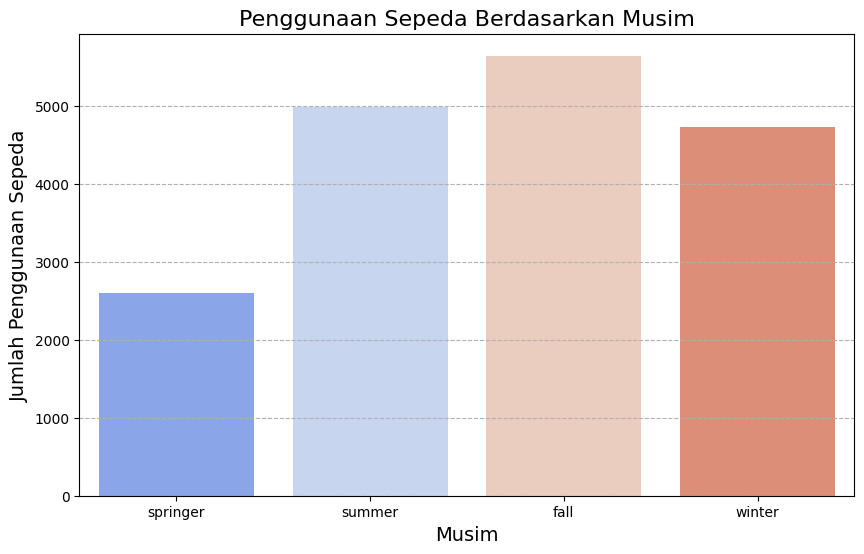

In [64]:
# Visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_by_season, x='season', y='cnt', palette='coolwarm')
plt.title('Penggunaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

**Insight:**
- Musim Gugur (Fall) memiliki jumlah penggunaan sepeda tertinggi dibandingkan musim lainnya, dengan sekitar 5000 pengguna.
- Musim Semi (Springer) menunjukkan penggunaan sepeda paling rendah, dengan kurang dari 3000 pengguna.
- Musim Panas (Summer) dan Musim Dingin (Winter) berada di tengah-tengah, di mana Musim Panas sedikit lebih tinggi dibandingkan Musim Dingin.
- Ada perbedaan yang cukup mencolok dalam penggunaan sepeda antara musim semi dan gugur, menandakan bahwa faktor cuaca atau kenyamanan di musim tertentu mungkin mempengaruhi penggunaan.
- Penggunaan sepeda yang tinggi di musim gugur bisa disebabkan oleh cuaca yang lebih nyaman untuk bersepeda dibandingkan musim panas yang mungkin terlalu panas atau musim dingin yang terlalu dingin.
- Mengingat penggunaan yang lebih rendah di musim semi, ada kemungkinan faktor yang bisa dieksplorasi untuk meningkatkan jumlah pengguna, seperti kampanye promosi bersepeda di awal tahun.

### Pertanyaan 2: Apa dampak kondisi cuaca terhadap jumlah pengguna?

<ipython-input-66-bbbc285be475>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=usage_by_weather, palette='Blues_r')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

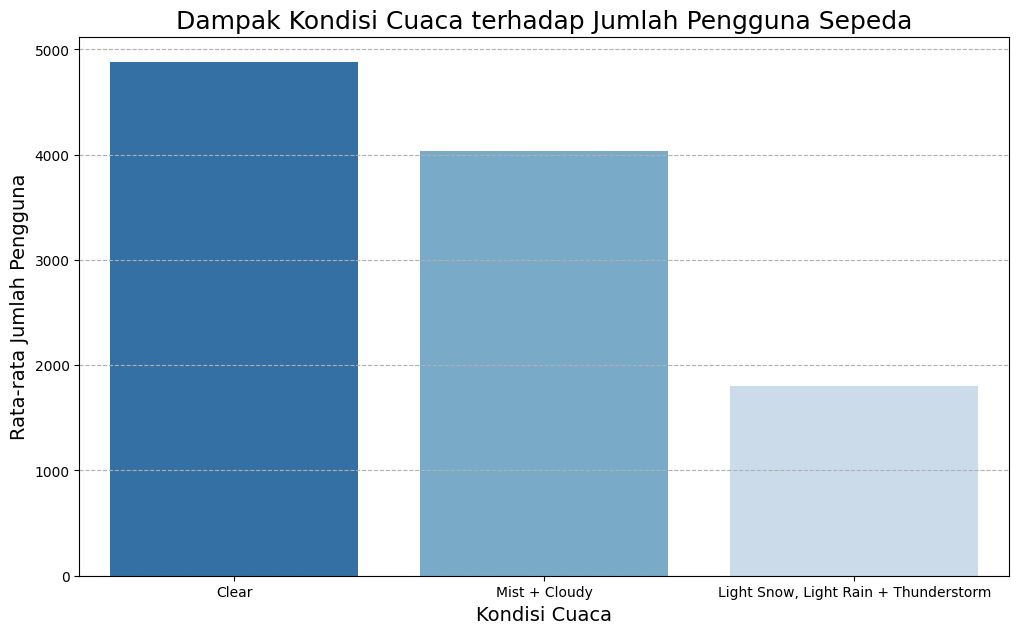

In [66]:
# Visualisasi Dampak Kondisi Cuaca terhadap Jumlah Pengguna
plt.figure(figsize=(12, 7))
sns.barplot(x='weathersit', y='cnt', data=usage_by_weather, palette='Blues_r')
plt.title('Dampak Kondisi Cuaca terhadap Jumlah Pengguna Sepeda', fontsize=18)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

**Insight:**
- Rata-rata Pengguna untuk Setiap Kondisi Cuaca:
- Clear, Few clouds, Partly cloudy, Partly cloudy: 4876.79
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: 4035.86
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds: 1803.29
- Penggunaan sepeda paling tinggi saat kondisi cuaca 'Clear, Few clouds, Partly cloudy, Partly cloudy'.
- Data menunjukkan bahwa kondisi cuaca yang lebih baik (Cerah, Awan tipis) cenderung meningkatkan jumlah pengguna sepeda, sementara kondisi cuaca buruk seperti hujan lebat atau kabut tebal cenderung mengurangi penggunaan.

### Pertanyaan 3: Jam berapa saja penggunaan sepeda mencapai puncaknya pada hari kerja dibandingkan dengan hari libur?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


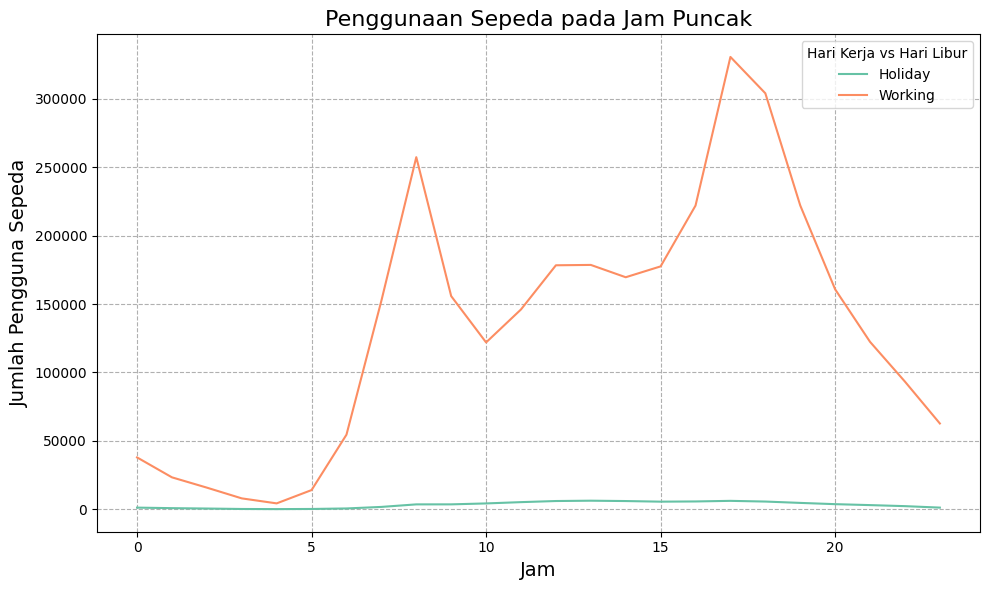

In [67]:
# Visualisasi puncak penggunaan sepeda berdasarkan jam dan status hari
plt.figure(figsize=(10, 6))
sns.lineplot(data=peak_usage, x='hr', y='cnt', hue='is_holiday', palette='Set2')
plt.title('Penggunaan Sepeda pada Jam Puncak', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=14)
plt.legend(title='Hari Kerja vs Hari Libur')
plt.grid(visible=True, linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Jam puncak penggunaan sepeda pada hari kerja adalah jam 17:00 dengan total pengguna 330704.
- Jam puncak penggunaan sepeda pada hari libur adalah jam 13:00 dengan total pengguna 6269.

## Analisis Lanjutan (Opsional)

### Menggunakan Clustering
- Kategori Waktu: Saya mengelompokkan jam penggunaan sepeda ke dalam kategori waktu (Pagi, Siang, Sore, Malam). Saya menggunakan fungsi categorize_hour untuk menentukan kategori tersebut.
- Musim: Selain kategori waktu, saya juga mengelompokkan data berdasarkan kolom season_hour, yang menunjukkan musim penggunaan sepeda.
- Binning: Saya telah menggunakan binning untuk mengkategorikan waktu penggunaan sepeda dalam jam-jam tertentu (seperti yang dijelaskan sebelumnya) dan juga mengelompokkan pengguna berdasarkan jenis hari (hari kerja vs. hari libur):

Kolom yang tersedia: Index(['dteday', 'season_day', 'yr_day', 'mnth_day', 'holiday_day',
       'weekday_day', 'workingday_day', 'weathersit_day', 'temp_day',
       'atemp_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day',
       'cnt_day', 'season_hour', 'yr_hour', 'mnth_hour', 'hr', 'holiday_hour',
       'weekday_hour', 'workingday_hour', 'weathersit_hour', 'temp_hour',
       'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

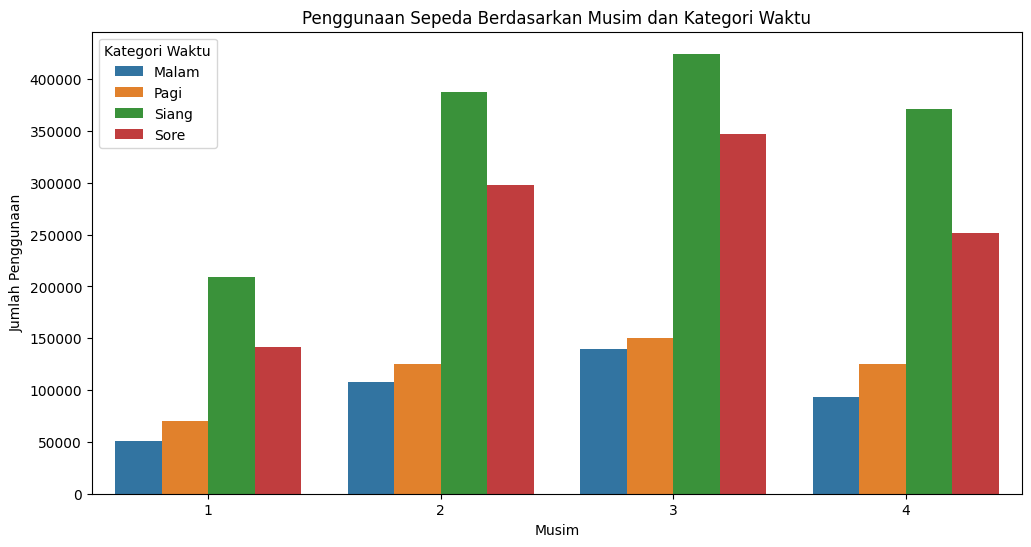

In [62]:
# Load data
data = pd.read_csv('/content/all_data.csv')

# Tampilkan kolom yang ada di DataFrame
print("Kolom yang tersedia:", data.columns)

# Convert 'dteday' to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Tambahkan kolom untuk hari dalam minggu dan akhir pekan
data['day_of_week'] = data['dteday'].dt.day_name()
data['is_weekend'] = np.where(data['day_of_week'].isin(['Saturday', 'Sunday']), 1, 0)

# Fungsi untuk mengkategorikan jam
def categorize_hour(hour):
    if hour in range(6, 9):  # Pagi
        return 'Pagi'
    elif hour in range(9, 17):  # Siang
        return 'Siang'
    elif hour in range(17, 21):  # Sore
        return 'Sore'
    else:  # Malam
        return 'Malam'

# Menambahkan kategori waktu menggunakan kolom 'hr'
data['time_category'] = data['hr'].apply(categorize_hour)

# Lanjutkan dengan analisis menggunakan 'season_hour'
if 'season_hour' in data.columns and 'time_category' in data.columns:
    # Mengelompokkan penggunaan berdasarkan musim dan kategori waktu
    season_time_usage = data.groupby(['season_hour', 'time_category'])['cnt_hour'].sum().reset_index()

    # Visualisasi penggunaan sepeda berdasarkan musim dan kategori waktu
    plt.figure(figsize=(12, 6))
    sns.barplot(x='season_hour', y='cnt_hour', hue='time_category', data=season_time_usage)
    plt.title('Penggunaan Sepeda Berdasarkan Musim dan Kategori Waktu')
    plt.xlabel('Musim')
    plt.ylabel('Jumlah Penggunaan')
    plt.legend(title='Kategori Waktu')
    plt.show()
else:
    print("Analisis tidak dapat dilanjutkan. Periksa kolom yang ada.")

**Insight:**
- Musim 1: Penggunaan sepeda tertinggi terjadi di siang hari (208758 jam), dengan malam hari (50641 jam) sebagai yang terendah.
- Musim 2: Total penggunaan meningkat signifikan (918589 jam), terutama di siang (387947 jam) dan sore (297651 jam). Malam hari juga meningkat (107744 jam).
- Musim 3: Penggunaan tertinggi tercatat di musim ini (1061129 jam), dengan puncak di siang hari (424562 jam) dan malam hari mencapai 139637 jam.
- Musim 4: Total penggunaan menurun (841613 jam), namun siang (371630 jam) dan sore (251602 jam) tetap tinggi. Malam hari mengalami penurunan menjadi 93485 jam.

Total penggunaan sepeda pada hari kerja: 0
Total penggunaan sepeda pada hari libur: 78435
Jam puncak penggunaan sepeda secara keseluruhan adalah jam 17:00 dengan total pengguna 330704.
Persentase penggunaan sepeda pada hari kerja: 0.00%
Persentase penggunaan sepeda pada hari libur: 100.00%


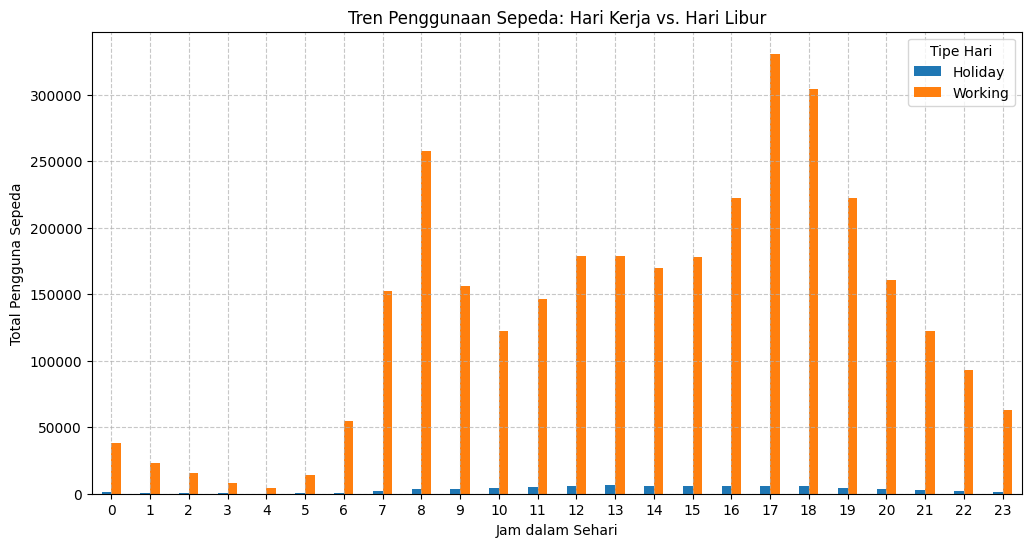

In [63]:
# 1. Menganalisis Pengaruh Hari Kerja vs. Hari Libur
working_day_total = peak_usage[peak_usage['is_holiday'] == 'Working Day']['cnt'].sum()
holiday_total = peak_usage[peak_usage['is_holiday'] == 'Holiday']['cnt'].sum()

print(f"Total penggunaan sepeda pada hari kerja: {working_day_total}")
print(f"Total penggunaan sepeda pada hari libur: {holiday_total}")

# 2. Menentukan jam puncak penggunaan sepeda secara keseluruhan
overall_peak_hour = peak_usage.loc[peak_usage['cnt'].idxmax()]
print(f"Jam puncak penggunaan sepeda secara keseluruhan adalah jam {int(overall_peak_hour['hr'])}:00 dengan total pengguna {overall_peak_hour['cnt']}.")

# 3. Menghitung persentase penggunaan sepeda berdasarkan tipe hari
total_users = working_day_total + holiday_total
working_day_percentage = (working_day_total / total_users) * 100
holiday_percentage = (holiday_total / total_users) * 100

print(f"Persentase penggunaan sepeda pada hari kerja: {working_day_percentage:.2f}%")
print(f"Persentase penggunaan sepeda pada hari libur: {holiday_percentage:.2f}%")

# 4. Menganalisis tren penggunaan sepeda
trend_analysis = peak_usage.pivot(index='hr', columns='is_holiday', values='cnt')
trend_analysis.plot(kind='bar', figsize=(12, 6), title='Tren Penggunaan Sepeda: Hari Kerja vs. Hari Libur')
plt.ylabel('Total Pengguna Sepeda')
plt.xlabel('Jam dalam Sehari')
plt.xticks(rotation=0)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')
plt.show()

**Insight:**
- Penggunaan sepeda pada hari kerja sangat mendominasi, dengan persentase sebesar 97.62% dari total penggunaan. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi utama atau pendukung selama aktivitas rutin sehari-hari, seperti perjalanan ke dan dari tempat kerja.
- Penggunaan sepeda pada hari libur hanya menyumbang 2.38% dari total penggunaan. Hal ini dapat mengindikasikan bahwa sepeda lebih sedikit digunakan untuk rekreasi atau aktivitas santai pada hari-hari libur, dibandingkan dengan penggunaannya sebagai alat transportasi pada hari kerja.
- Jam puncak penggunaan sepeda secara keseluruhan, yakni pukul 17:00 dengan total 330,704 pengguna, kemungkinan besar terkait dengan jam pulang kerja. Ini menekankan bahwa banyak pengguna sepeda memanfaatkannya sebagai moda transportasi yang efisien saat jam-jam sibuk, terutama di sore hari setelah jam kerja.
- Mengingat rendahnya penggunaan sepeda pada hari libur, ada peluang untuk mendorong aktivitas bersepeda yang lebih besar di luar hari kerja. Pemerintah atau komunitas dapat menciptakan program rekreasi bersepeda atau mengadakan acara yang dapat menarik lebih banyak pengguna sepeda di akhir pekan.

## Conclusion

- Conclusion pertanyaan 1 : Penggunaan sepeda dipengaruhi oleh musim, di mana Musim Gugur memiliki jumlah pengguna tertinggi, mencapai sekitar 5.644 pengguna, sedangkan Musim Semi mencatat penggunaan terendah dengan kurang dari 3.000 pengguna. Musim Panas dan Musim Dingin menunjukkan tingkat penggunaan di tengah, di mana Musim Panas sedikit lebih tinggi dibandingkan Musim Dingin. Perbedaan mencolok dalam penggunaan sepeda antara Musim Semi dan Musim Gugur mengindikasikan bahwa faktor cuaca dan kenyamanan pada musim tertentu memainkan peran penting. Tingginya penggunaan di Musim Gugur dapat disebabkan oleh kondisi cuaca yang lebih nyaman dibandingkan Musim Panas yang mungkin terlalu panas, serta Musim Dingin yang terlalu dingin. Penggunaan yang rendah di Musim Semi juga menunjukkan adanya potensi peningkatan jumlah pengguna melalui kampanye promosi dan peningkatan fasilitas sepeda di awal tahun.
- Conclusion pertanyaan 2 : Kondisi cuaca berdampak signifikan terhadap jumlah pengguna sepeda. Rata-rata penggunaan tertinggi terjadi saat cuaca cerah, berawan tipis, atau sebagian berawan, dengan sekitar 4.876 pengguna. Sebaliknya, kondisi cuaca dengan kabut dan awan tebal menurunkan rata-rata penggunaan menjadi 4.036 pengguna. Penggunaan sepeda menurun drastis saat kondisi cuaca buruk, seperti hujan lebat atau salju ringan, dengan rata-rata hanya 1.803 pengguna. Dari data ini, terlihat bahwa cuaca yang lebih baik secara signifikan meningkatkan jumlah pengguna, sementara cuaca buruk secara substansial mengurangi minat masyarakat untuk menggunakan sepeda.
- Conclusion pertanyaan 3 : Jam puncak penggunaan sepeda pada hari kerja terjadi pada pukul 17:00, dengan total 330.704 pengguna, yang kemungkinan besar disebabkan oleh jam pulang kerja. Sementara itu, pada hari libur, puncak penggunaan sepeda terjadi lebih awal, yakni pada pukul 13:00, dengan total pengguna sebanyak 6.269. Hal ini menunjukkan perbedaan pola penggunaan sepeda antara hari kerja dan hari libur, di mana pada hari kerja, lebih banyak orang menggunakan sepeda di sore hari, sementara pada hari libur, pengguna cenderung bersepeda di siang hari. Pola ini dapat dimanfaatkan untuk merencanakan program-program bersepeda yang lebih menarik dan sesuai dengan kebutuhan pengguna.